# Start and Load

In [516]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from catboost import CatBoostRegressor
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV, train_test_split

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) # отключение ограничений

In [517]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
print("train data shape -- ", train.shape)
print("test data shape -- ", test.shape)

train data shape --  (1460, 81)
test data shape --  (1459, 80)


# EDA

In [518]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [519]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [520]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


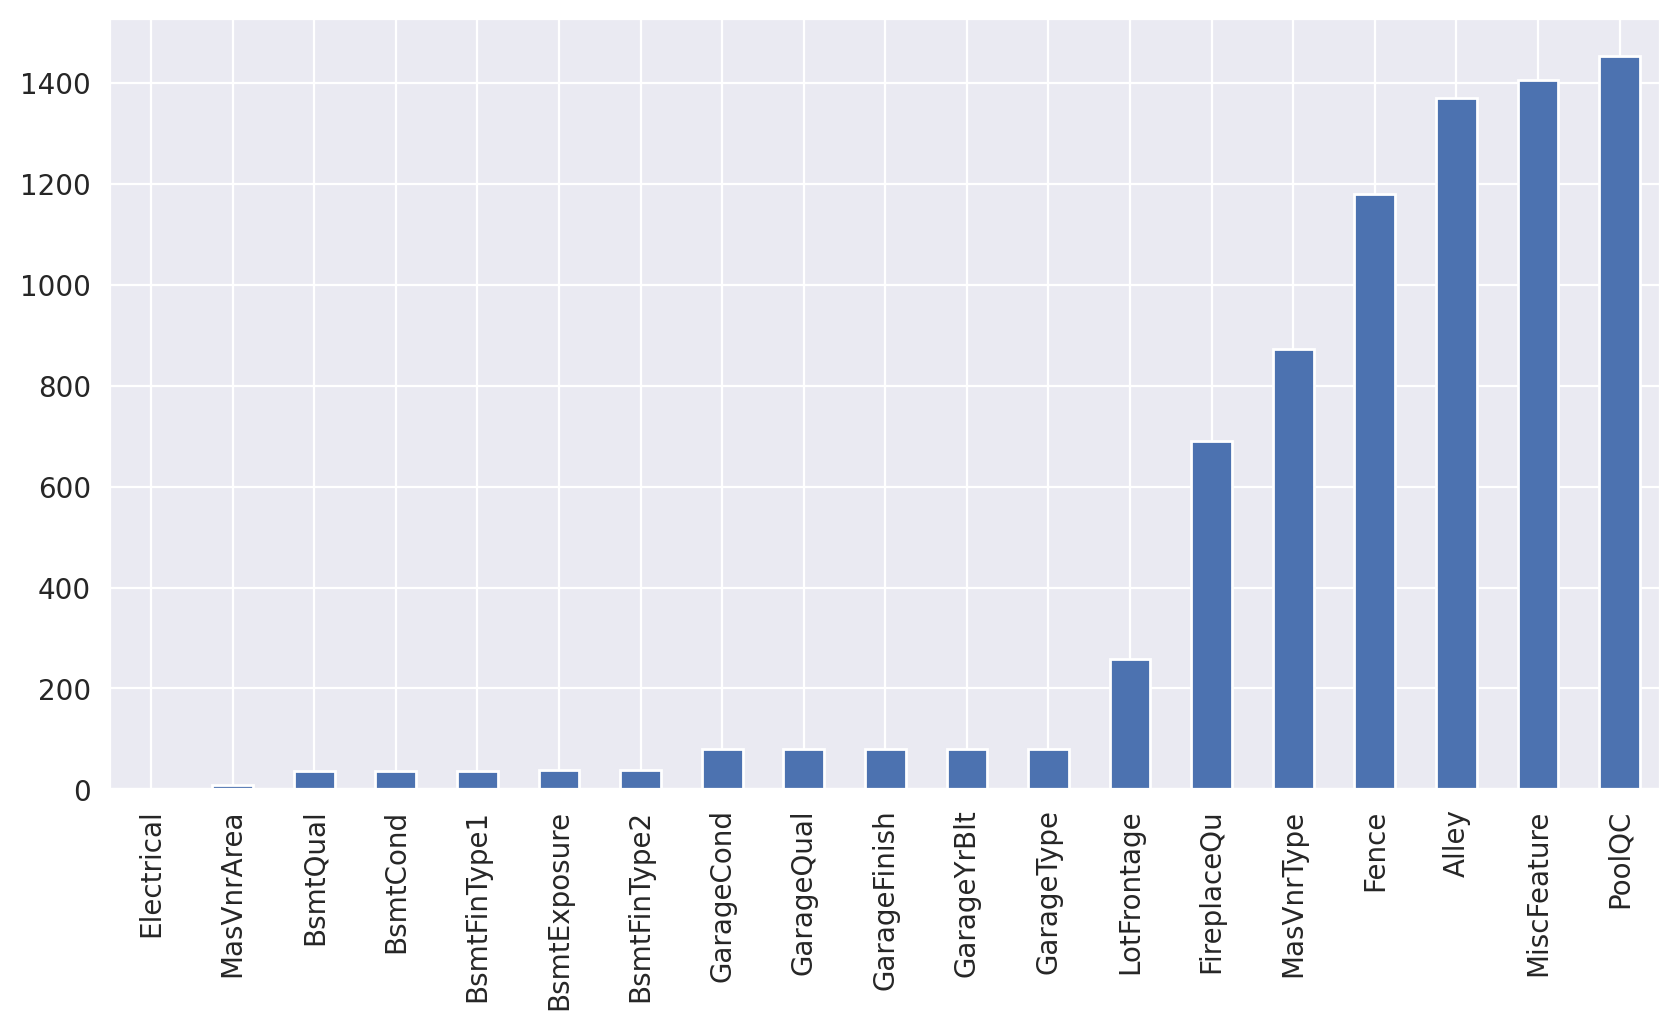

In [521]:
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
plt.figure(figsize=(10, 5), dpi=200)
missing.plot.bar();

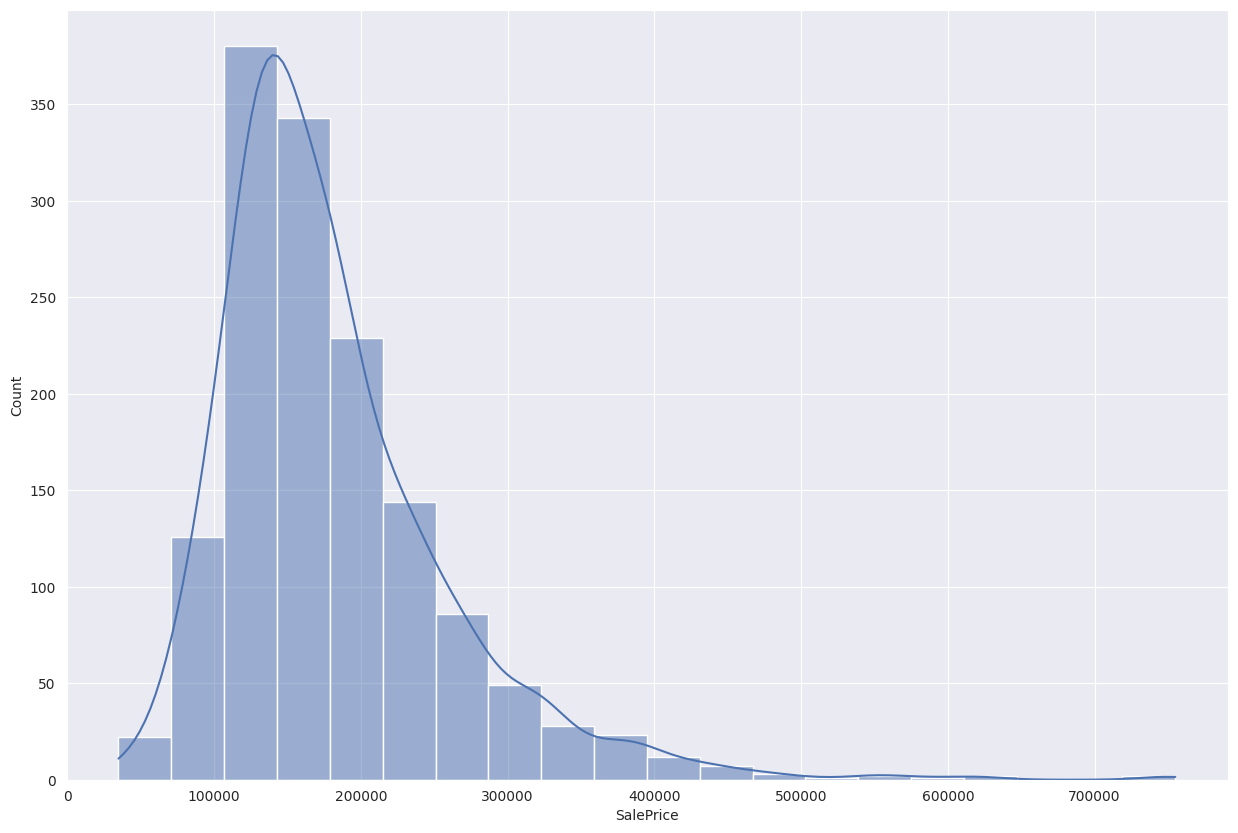

In [522]:
sns.set({'figure.figsize':(15, 10)})
sns.histplot(train['SalePrice'], kde=True, bins=20);

**split train data to numeric and categorial data**

In [523]:
numeric_features = train.select_dtypes(include=[int, float])
numeric_features.drop(['Id', 'MSSubClass'], axis=1, inplace=True)
numeric_columns = numeric_features.columns

In [524]:
numeric_features.isnull().sum()

LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [525]:
test[numeric_columns[:-2]].isnull().sum()

LotFrontage      227
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        15
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       78
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
dtype: int64

In [526]:
correlation = numeric_features.corr()
correlation['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

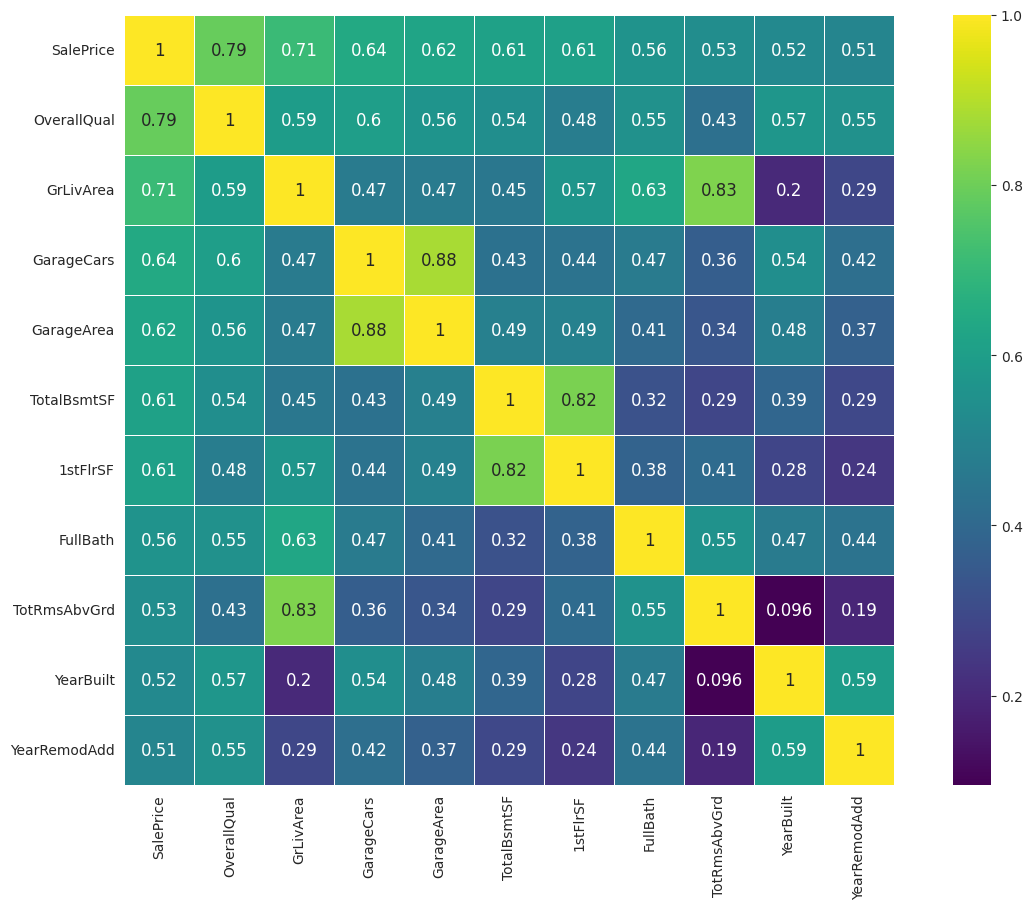

In [527]:
k = 11
cols = correlation.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.heatmap(data=cm, linewidths=0.5, square=True, annot=True,
            annot_kws={'size':12}, xticklabels=cols.values,
            yticklabels=cols.values, cmap='viridis');

# Trying to drop outliers

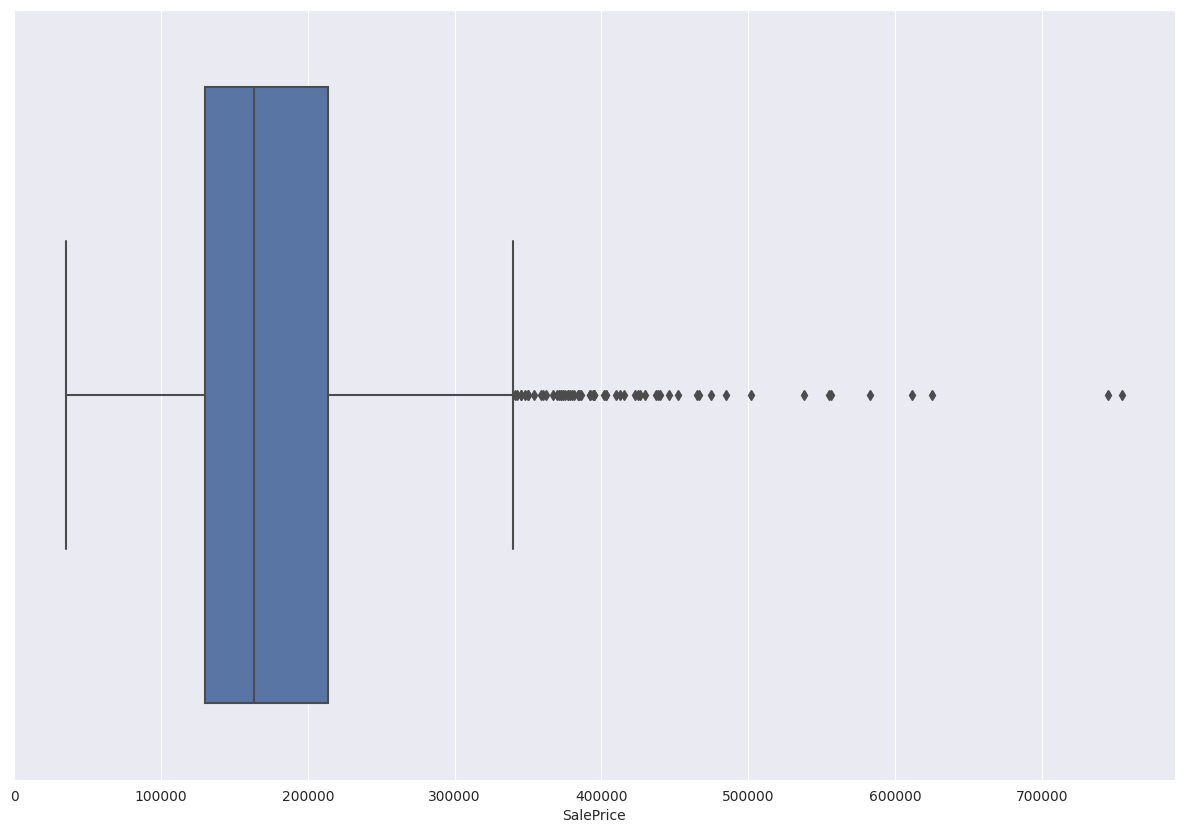

In [528]:
sns.boxplot(x=train['SalePrice']);

In [529]:
first_quartile = train['SalePrice'].quantile(.25)
third_quartile = train['SalePrice'].quantile(.75)
IQR = third_quartile - first_quartile

In [530]:
new_boundary = third_quartile + 3 * IQR

In [531]:
print(train.shape)
del_indexes = train[train['SalePrice'] > new_boundary].index
train.drop(del_indexes, axis=0, inplace=True)
print(train.shape)

(1460, 81)
(1448, 81)


**So, we dropped 12 outliers. Sounds good**

# Remove bad features

In [532]:
def prepare_df(df):
    data = df.copy()
    
    cols_to_remove = ['MoSold', '3SsnPorch',
                      'BsmtFinSF2', 'MiscVal',
                      'LowQualFinSF', 'YrSold',
                      'OverallCond', 'TotRmsAbvGrd',
                      '1stFlrSF', 'PoolQC', 'Alley',
                      'Fence', 'MiscFeature', 'GarageCars'
                       ]
    
    data.drop(cols_to_remove, axis=1, inplace=True)
    return data

In [533]:
print(train.shape)
train = prepare_df(train)
test = prepare_df(test);
print(train.shape)

(1448, 81)
(1448, 67)


In [534]:
df = pd.concat([train[train.columns], test], ignore_index=True) 

print("df shape: ", df.shape)

df shape:  (2907, 67)


In [535]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       485
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType       1764
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
2ndFlrSF            0
GrLivArea           0
BsmtFullBath        2
BsmtHalfBath        2
FullBath            0
HalfBath  

# Fill NaN

In [536]:
def filling_values(df):
    data = df.copy()
    
    cols_to_knn = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'GarageArea', 'BsmtFinSF1',
                   'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath']
    imputer = KNNImputer(n_neighbors=3, weights='distance')
    data[cols_to_knn] = imputer.fit_transform(data[cols_to_knn])
    
    data['Street'] = data['Street'].agg(lambda x: 0 if 'Grvl' else 1)
    data['CentralAir'] = data['CentralAir'].agg(lambda x: 0 if 'N' else 1)

    return data

In [537]:
print(train.shape)
train.dropna(subset=['SaleType', 'Functional', 'Electrical'], axis=0, inplace=True)
train = filling_values(train)
print(train.shape)

(1448, 67)
(1447, 67)


In [538]:
print(test.shape)
test = filling_values(test)
print(test.shape)

(1459, 66)
(1459, 66)


In [539]:
change_nan_cols_to_unk = ['GarageCond', 'GarageQual',
                               'GarageFinish','GarageType',
                               'MasVnrType', 'FireplaceQu']

change_nan_cols_to_moda = ['MSZoning', 'Utilities',
                                 'Exterior1st', 'Exterior2nd',
                                 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                                 'BsmtFinType1', 'BsmtFinType2', 'KitchenQual',
                                 'Functional', 'SaleType']

In [540]:
test[change_nan_cols_to_unk] = test[change_nan_cols_to_unk].fillna('Unknown')
train[change_nan_cols_to_unk] = train[change_nan_cols_to_unk].fillna('Unknown')
for col in change_nan_cols_to_moda:
    test[col] = test[col].fillna(test[col].value_counts().index[0])
    train[col] = train[col].fillna(train[col].value_counts().index[0])

# Model

In [541]:
iterations = [700] # i have already check all params
depth = [5]

param_grid = {'iterations': iterations,
              'depth': depth}

In [542]:
cat_columns = list(train.select_dtypes(include=[object]).columns)

In [543]:
model = CatBoostRegressor(loss_function='RMSE',
                          cat_features=cat_columns)

In [544]:
grid = GridSearchCV(model, param_grid, n_jobs=-1, verbose=False) # cv=5

In [545]:
X = train.drop(['Id', 'SalePrice'], axis=1)
y = train['SalePrice']

In [546]:
grid.fit(X, y)

589:	learn: 12031.3056494	total: 34.5s	remaining: 6.43s
590:	learn: 12019.7592183	total: 34.5s	remaining: 6.37s
591:	learn: 12004.1169840	total: 34.6s	remaining: 6.31s
592:	learn: 11987.2305826	total: 34.6s	remaining: 6.25s
593:	learn: 11972.5751168	total: 34.7s	remaining: 6.19s
594:	learn: 11964.6626325	total: 34.8s	remaining: 6.14s
595:	learn: 11956.8980369	total: 34.9s	remaining: 6.08s
596:	learn: 11930.2692053	total: 34.9s	remaining: 6.02s
597:	learn: 11925.4239601	total: 35s	remaining: 5.97s
598:	learn: 11908.7335687	total: 35s	remaining: 5.91s
599:	learn: 11906.8364183	total: 35.1s	remaining: 5.85s
600:	learn: 11885.8420112	total: 35.2s	remaining: 5.8s
601:	learn: 11883.5019655	total: 35.3s	remaining: 5.74s
602:	learn: 11869.7645956	total: 35.3s	remaining: 5.68s
603:	learn: 11863.7396711	total: 35.4s	remaining: 5.63s
604:	learn: 11855.2780478	total: 35.5s	remaining: 5.57s
605:	learn: 11852.9161314	total: 35.5s	remaining: 5.51s
606:	learn: 11836.6961665	total: 35.6s	remaining: 5.4

GridSearchCV(estimator=<catboost.core.CatBoostRegressor object at 0x7d6dfab94400>,
             n_jobs=-1, param_grid={'depth': [5], 'iterations': [700]},
             verbose=False)

In [547]:
# grid.best_params_

In [548]:
predictions = grid.predict(test.iloc[:, 1:])

In [549]:
output = pd.DataFrame({"Id": test['Id'], "SalePrice": predictions})
output.to_csv("last_submissions.csv", index=False)

In [550]:
# top 24%